# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [2]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [6]:
# RUN THIS CELL TO IMPORT YOUR DATA.
modified_c4_epa_air_quality = pd.read_csv('modified_c4_epa_air_quality.csv')
modified_c4_epa_air_quality = modified_c4_epa_air_quality.dropna()


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [7]:
# Display first 10 rows of the data.
modified_c4_epa_air_quality.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,1.386294


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [15]:
print(f"Number of rows: {modified_c4_epa_air_quality.shape[0]}")
print(f"Number of columns: {modified_c4_epa_air_quality.shape[1]}")

Number of rows: 257
Number of columns: 8


Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

<Axes: >

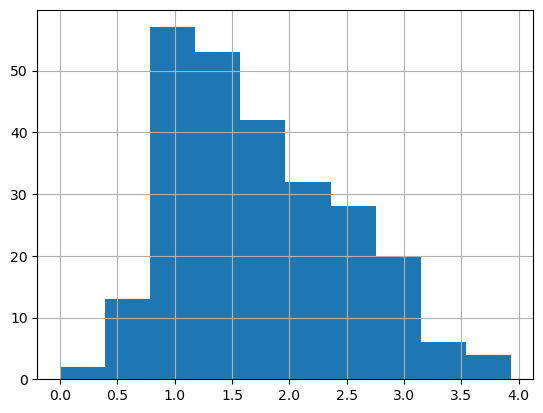

In [17]:
# Create a histogram to visualize distribution of aqi_log.
modified_c4_epa_air_quality['aqi_log'].hist()

**Question:** What do you observe about the shape of the distribution from the histogram? 

A: It skews to the right

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [22]:
# Define variable for aqi_log mean.
mean_aqi_log = modified_c4_epa_air_quality['aqi_log'].mean()

# Print out the mean.
mean_aqi_log

np.float64(1.7689182585091165)

In [23]:
# Define variable for aqi_log standard deviation.
std_aqi_log = modified_c4_epa_air_quality['aqi_log'].std()


# Print out the standard deviation.
std_aqi_log

np.float64(0.7164977499700741)

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [28]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.
print("lower_limit: " + str(lower_limit))
print("upper_limit: " + str(upper_limit))

lower_limit: 1.0524205085390426
upper_limit: 2.4854160084791905


In [29]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((modified_c4_epa_air_quality['aqi_log'] >= lower_limit) & (modified_c4_epa_air_quality['aqi_log'] <= upper_limit)).mean()


np.float64(0.7898832684824902)

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [32]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print("lower_limit: " + str(lower_limit))
print("upper_limit: " + str(upper_limit))

lower_limit: 0.33592275856896836
upper_limit: 3.2019137584492645


In [31]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((modified_c4_epa_air_quality['aqi_log'] >= lower_limit) & (modified_c4_epa_air_quality['aqi_log'] <= upper_limit)).mean()


np.float64(0.9571984435797666)

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [33]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log


# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log


# Display lower_limit, upper_limit.
print("lower_limit: " + str(lower_limit))
print("upper_limit: " + str(upper_limit))

lower_limit: -0.38057499140110584
upper_limit: 3.918411508419339


In [34]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((modified_c4_epa_air_quality['aqi_log'] >= lower_limit) & (modified_c4_epa_air_quality['aqi_log'] <= upper_limit)).mean()



np.float64(0.9961089494163424)

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A: It is normally distributed

**Question:** How would you use z-score to find outliers? 

A: Set a threshold and see if there is data falling out of it

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [37]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
modified_c4_epa_air_quality['Z-SCORE'] = stats.zscore(modified_c4_epa_air_quality['aqi_log'])

 # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
modified_c4_epa_air_quality


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z-SCORE
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.434236
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.031941
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.937357
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.535062
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.535062
...,...,...,...,...,...,...,...,...,...
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050,1.313283
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294,-0.535062
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612,-0.937357
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612,-0.937357


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [39]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
modified_c4_epa_air_quality[(modified_c4_epa_air_quality['Z-SCORE'] > 3) | (modified_c4_epa_air_quality['Z-SCORE'] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z-SCORE
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.024612


**Question:** What do you observe about potential outliers based on the calculations?


A: Arizona on Jan 1st, 2018

**Question:** Why is outlier detection an important part of this project? 

A: To make outcome more representative

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A: To generate z-scores and limits, and use their correponding operations

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**

A: Arizona has much worse aqi than other states on Jan 1st, 2018

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 